# First import python libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
upload=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (2).csv


In [ ]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.drop('ID#',axis=1,inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


# **Data Preprocessing:**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

# Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

In [ ]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [ ]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df_imputed

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
3995,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
3996,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0


In [ ]:
# Removing outliers using Z-score (optional)
df_cleaned = df_imputed[(np.abs(stats.zscore(df_imputed)) < 3).all(axis=1)]

In [ ]:
df_cleaned

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,1.0
3995,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,1.0
3996,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,1.0
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0


In [ ]:
# Scaling features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

In [ ]:
df_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.523260,-0.158869,-0.755664,0.0,0.0,-0.779029,-1.147142,-0.401822,-0.431775,1.431438,-0.718093
1,-0.667084,-0.158869,-0.755664,0.0,0.0,-0.776768,-1.025933,-0.401822,-0.431775,1.415848,-0.718093
2,-0.309747,-0.158869,-0.755664,0.0,0.0,-0.561235,-0.783516,-0.401822,-0.431775,1.448002,-0.718093
3,-0.739295,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,-0.401822,-0.431775,1.408053,-0.718093
4,0.601746,-0.158869,1.517591,0.0,0.0,1.599448,1.883076,2.859455,1.768005,1.399771,1.392577
...,...,...,...,...,...,...,...,...,...,...,...
3625,-0.679496,-0.158869,-0.755664,0.0,0.0,-0.318457,-0.783516,-0.087785,0.118170,-1.295323,1.392577
3626,0.062475,-0.158869,-0.755664,0.0,0.0,-0.734522,-0.662307,-0.401822,-0.431775,-1.299221,1.392577
3627,0.211358,-0.158869,0.759839,0.0,0.0,0.614823,-0.298681,-0.401822,-0.431775,-1.295810,1.392577
3628,-0.090836,-0.158869,-0.755664,0.0,0.0,-0.761050,-1.147142,0.383271,0.118170,-1.296298,-0.718093


# Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

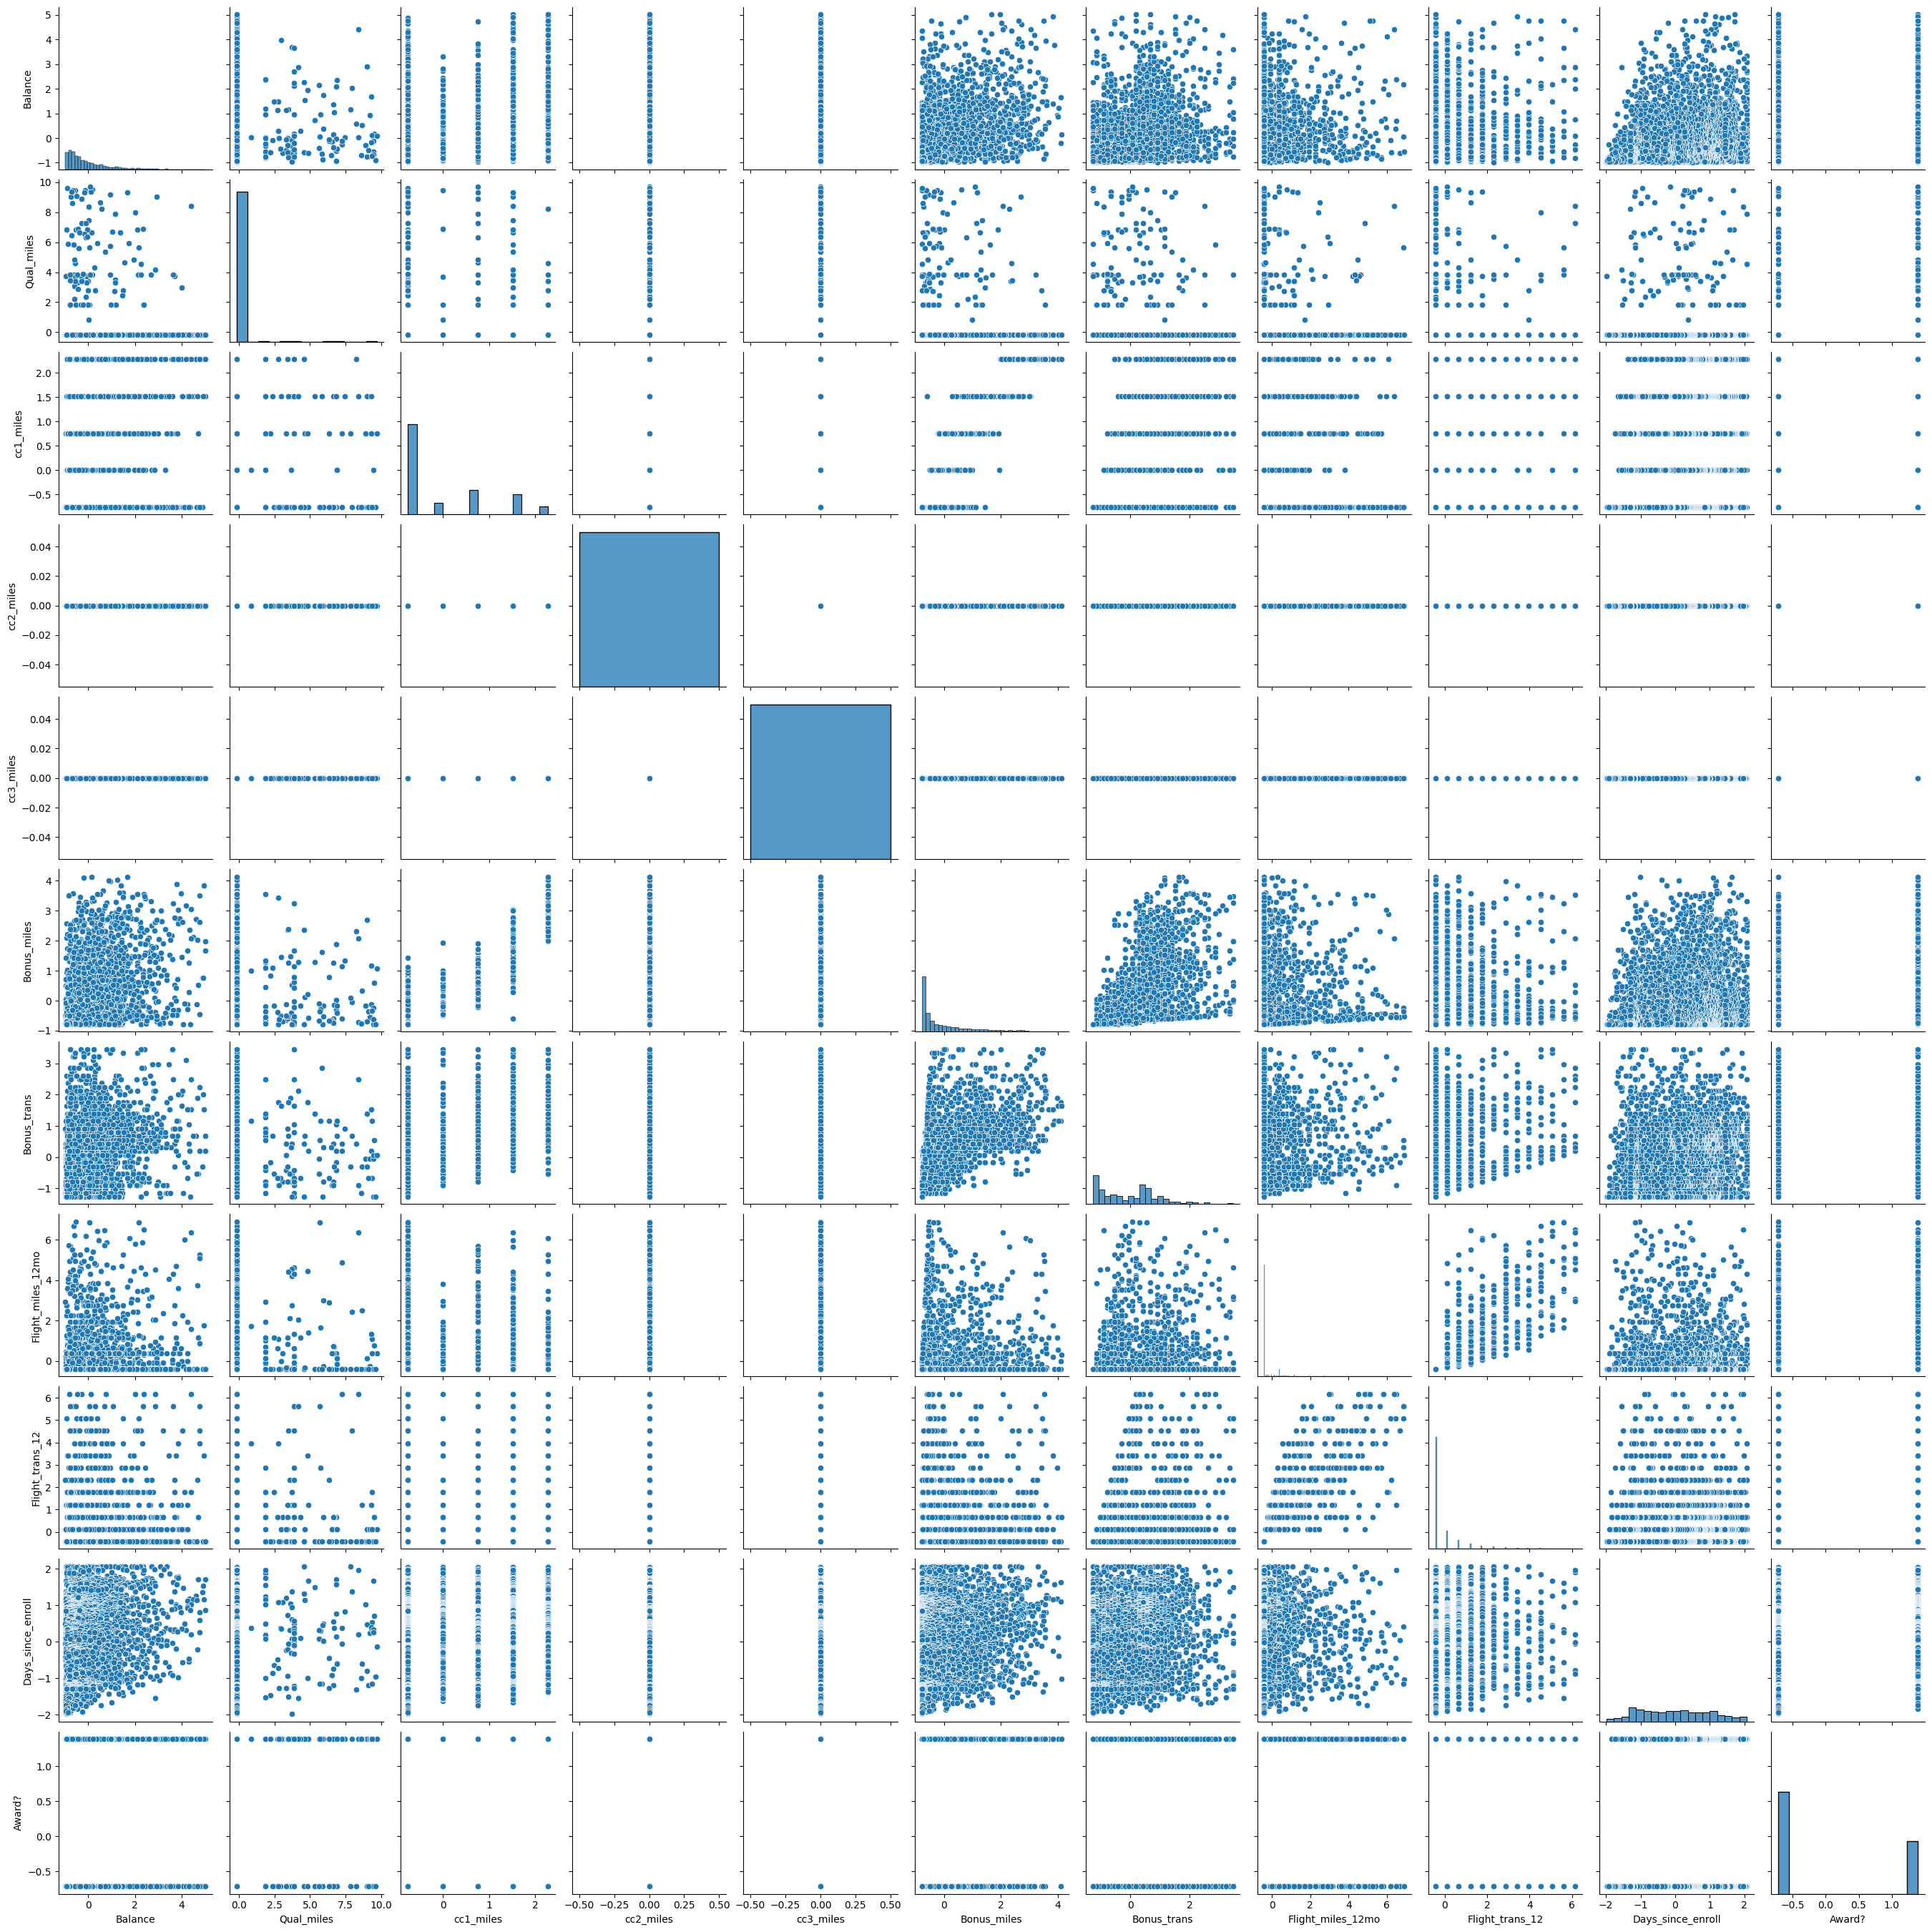

In [ ]:
#pairplot to visualize relationship
sns.pairplot(df_scaled)
plt.show()

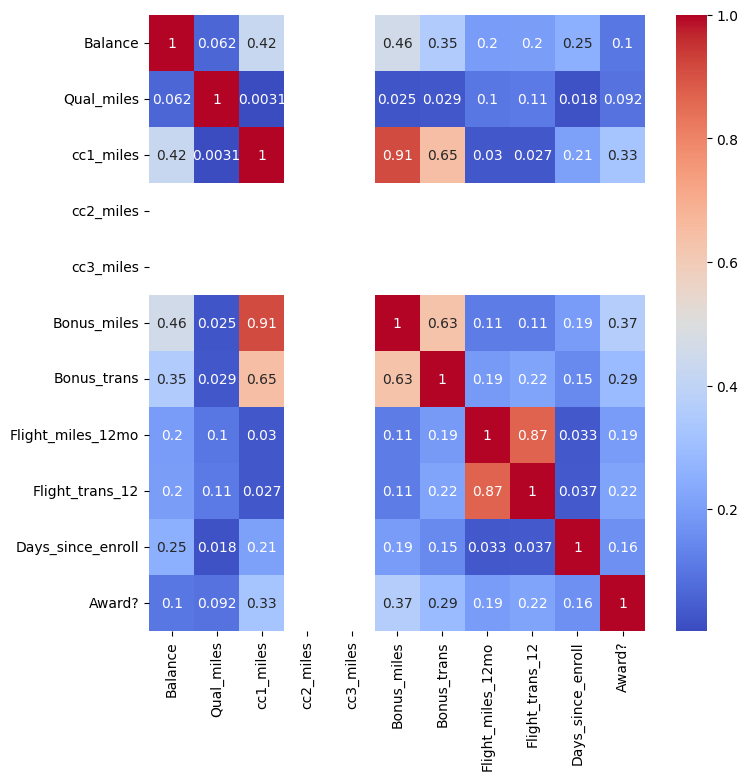

In [ ]:
# Heatmap to check correlation
plt.figure(figsize=(8,8))
sns.heatmap(df_scaled.corr(),annot=True,cmap='coolwarm')
plt.show()

# **Implementing Clustering Algorithms:**

# Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

# K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Elbow method to find the optimal number of clusters

wcss=[]
km=range(1,10)
for k in km:
  kmeans=KMeans(n_clusters=k , random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

# Plotting the Elbow Curve

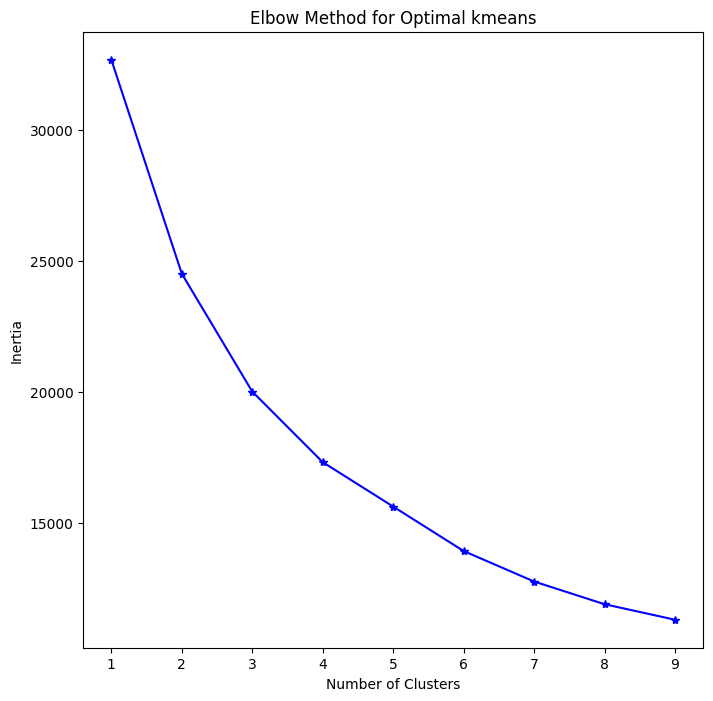

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(km,wcss,'b*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal kmeans')
plt.show()

# Apply K-Means with the optimal K

In [ ]:
kmeans=KMeans(n_clusters=3 , random_state=42)
kmeans_labels=kmeans.fit_predict(df_scaled)
kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [ ]:
# Evaluate using the silhouette score
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print('Silhouette Score :=',silhouette_kmeans)

Silhouette Score := 0.31914997508947546


# **Hierarchical Clustering**

# in Hierarchical clustering Agglomerative clustering are using

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# Plot Dendrogram

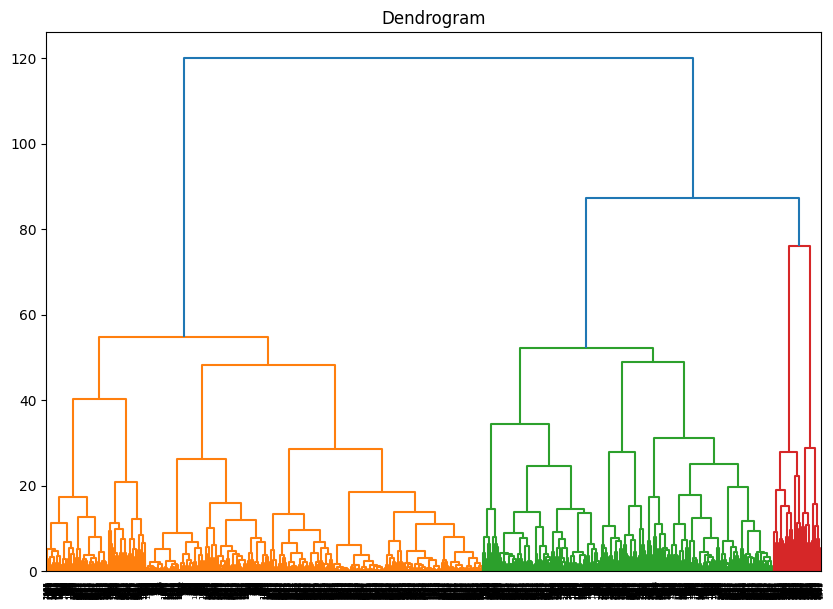

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=shc.dendrogram(shc.linkage(df_scaled, method='ward'))


# Apply Hierarchical clustering

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
silhouette_hierarchical=silhouette_score(df_scaled,hierarchical_labels)
print('Silhouette Score :=',silhouette_hierarchical)

Silhouette Score := 0.28440398074016243


# **DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN


# **Apply the DBSCAN**

In [66]:
dbscan=DBSCAN(eps=0.5, min_samples=5)
dbscan_labels=dbscan.fit_predict(df_scaled)

In [67]:
# Evaluate using silhouette score ( if cluster larger than 1)

if len(set(dbscan_labels))>1:
  silhouette_dbscan = silhouette_score(df_scaled,dbscan_labels)
  print('Silhouette dbscan :-',silhouette_dbscan)
else:
  print('DBSCAN did not form significant clusters.')

Silhouette dbscan :- -0.2868751166819865


In [68]:
print('Number of cluster :-',len(set(dbscan_labels)))

Number of cluster :- 23


# **Visualization of Clusters**

# Scatter plot for K-means cluster

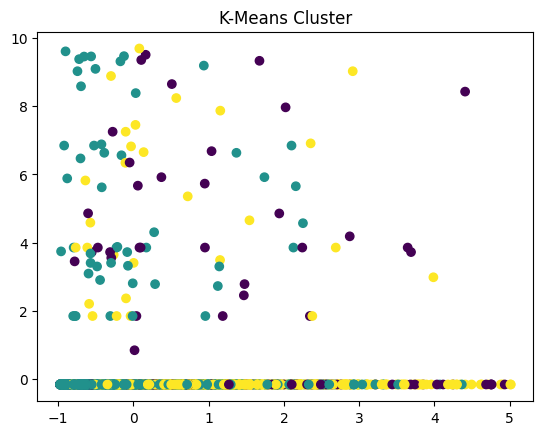

In [70]:
plt.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,1],c=kmeans_labels,cmap='viridis')
plt.title('K-Means Cluster')
plt.show()

# Scatter plot for Hierarchical Clusters

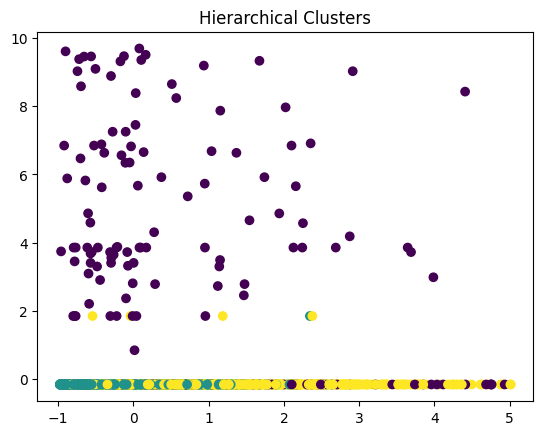

In [71]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clusters')
plt.show()

# Scatter plot for DBSCAN Clusters

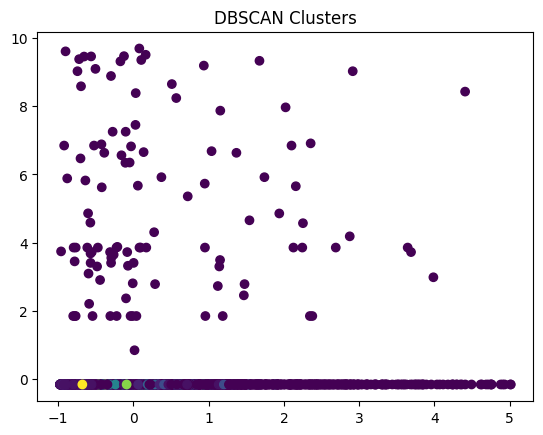

In [72]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.show()